# Employee Turnover Prediction at Salifort Motors

## Project Overview

This project's goal was to analyze employee data from Salifort Motors to identify key factors that contribute to employee turnover using various machine learning models. Predicting which employees are likely to leave the company, allows HR to take proactive steps to improve retention.

The dataset includes employee features like satisfaction, evaluation scores, tenure, and work-related statistics.

The best-performing models were the Decision Tree and Random Forest, with recall scores of 92.0% and 91.5% respectively.

## Business Problem:

The HR department of Salifort Motors is concerned about employee turnover, a critical issue for many companies. High turnover rates lead to substantial recruitment and training costs and can cause operational disruptions. The department wants to understand what features contribute most to emloyee turnover rates and identify employees at risk. By retaining employees, Salifort Motors aims to lower these costs and maintain a more stable and experienced workforce.

Employee turnover costs have been studied in depth across industries, with estimates indicating that replacing an employee can cost anywhere from [50% to over 200%](https://www.jobvite.com/blog/cost-of-employee-turnover/#:~:text=The%20true%20cost%20of%20employee,annual%20salary%20to%20replace%20them.) of their annual salary, depending on the role and expertise required. Actively improving retention, therefore, not only save direct costs but can also lead to better employee satisfaction and company culture.


## Data

The dataset collected includes several variables that could influence employee turnover, such as:

* Satisfaction Level: Self-reported satisfaction scores from employees.
* Last Evaluation: Performance evaluations given to employees.
* Number of Projects: The number of projects the employee has worked on.
* Average Monthly Hours: Time spent working in the company each month.
* Years at the Company: Employee tenure.
* Work Accident: Whether the employee has experienced a work accident.
* Promotion in Last 5 Years: If the employee has been promoted in the last five years.
* Department: Department in which the employee works.
* Salary: Salary levels (Low, Medium, High).
* Turnover (Target): Whether the employee left the company or not.

Data Limitations:

* There may be potential biases in self-reported data, such as satisfaction levels.
* Salary data is categorized, limiting insights into precise pay discrepancies.
* The time frame of the data is not explicitly provided, so trends over time may be difficult to analyze without that context.
* Some features might be a scource of data leakage, such as Satisfaction levels and Evaluations, as such features are depenant on data scarsely collected.

# Modeling

In [1]:
#Data manipulation
import numpy as np
import pandas as pd
from scipy import stats

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Metrics and useful functions
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

#Saving models
import pickle

In [2]:
data = pd.read_csv("HR_capstone_dataset.csv")

## EDA

### Cleaning

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Cleaning dataset's column names

In [6]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
#Changes all column names to be in lowercase
for name in data.columns:
    data.rename(columns={name:name.lower()},inplace=True)

data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
#imporve readability and correct misspelings
data.rename(columns={'average_montly_hours':'average_monthly_hours'},inplace=True)
data.rename(columns={'time_spend_company':'tenure'},inplace=True)

#### Checking for missing values

In [9]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No missing values were found

#### Checking for duplicates

In [10]:
data.duplicated().sum()

3008

In [11]:
data.duplicated().sum()/len(data.index)

0.2005467031135409

There are 3008 duplicated entries, correlating to 20.05% of the dataset being comprised of duplicated entries

#### Pattern analysis within duplicated data

In [12]:
data[data.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
data[data.duplicated()].describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
count,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008,3008
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,901,1576
mean,0.545765,0.713787,3.803856,203.349734,4.029920,0.106051,0.525266,0.038564,NaN,NaN
std,0.266406,0.182012,1.477272,54.467101,1.795619,0.307953,0.499444,0.192585,NaN,NaN
min,0.090000,0.360000,2.000000,97.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.380000,0.540000,2.000000,151.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.530000,0.725000,4.000000,204.000000,3.000000,0.000000,1.000000,0.000000,NaN,NaN
75%,0.780000,0.880000,5.000000,253.000000,5.000000,0.000000,1.000000,0.000000,NaN,NaN


In [14]:
data.department.value_counts(normalize=True)['sales']*3008

830.2633508900592

In [15]:
data.salary.value_counts(normalize=True)['low']*3008

1467.1996799786652

In [16]:
#Chance of two people randomly having the exact same information
1/100*1/100*1/6*1/200*1/9*1/2*1/2*1/2*1/10*1/3

3.8580246913580245e-11

There isn't any specific pattern to the duplicated entries and they are too prolific to be random chance, suggest investigating further into possible problems regarding data entry or storage

As explained, data is unlikely to be representative and as such should be remomved

In [17]:
data1 = data.drop_duplicates(keep='first')

#### Checking for outliers

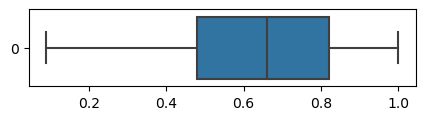

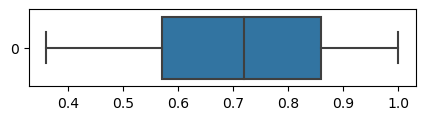

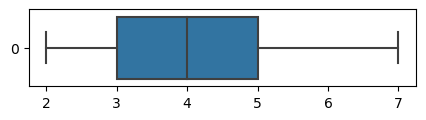

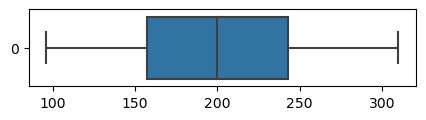

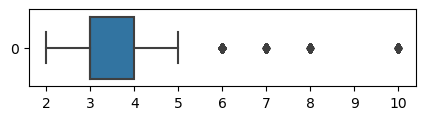

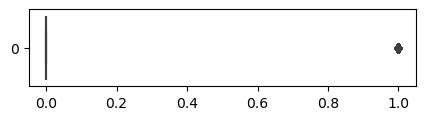

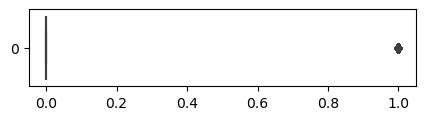

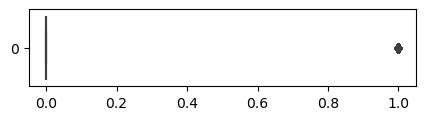

ValueError: could not convert string to float: 'sales'

<Figure size 500x100 with 0 Axes>

In [18]:
for column in data1.columns:
    plt.figure(figsize=(5,1))
    sns.boxplot(data1[column],orient='h')
    plt.show()

Only tenure has significant outliers that might need to be removed depending on the model chosen

### Exploration

How many employees are leaving the company

In [ ]:
data1['left'].value_counts()

In [ ]:
data1['left'].value_counts(normalize=True)

Why are employees leaving

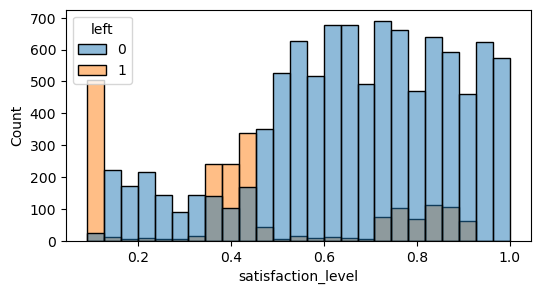

In [19]:
plt.figure(figsize=(6,3))
sns.histplot(data=data1,x='satisfaction_level',bins=25,hue='left',alpha=0.5)
plt.show()

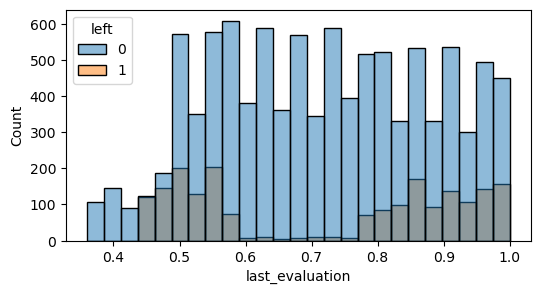

In [20]:
plt.figure(figsize=(6,3))
sns.histplot(data=data1,x='last_evaluation',bins=25,hue='left',alpha=0.5)
plt.show()

Satisfaction level vs Last evaluation shows the relationship betwwen the satisfaction of the company and an employee with their own work

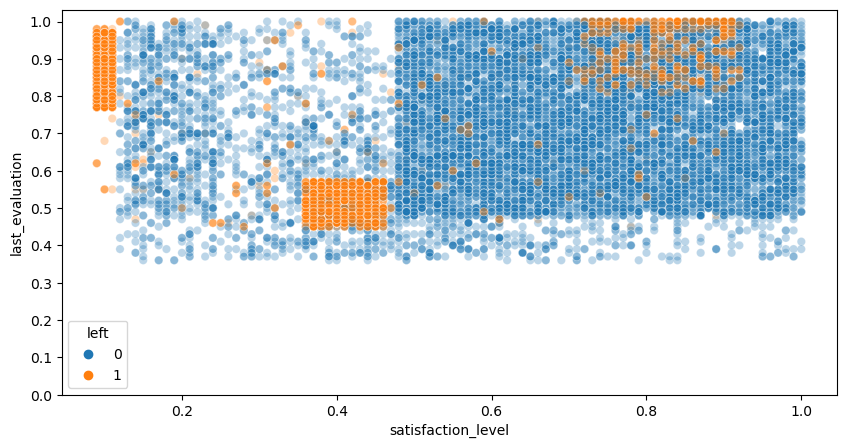

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='satisfaction_level',y='last_evaluation',hue='left',alpha=0.3)
plt.yticks([x/10 for x in range(0,11,1)])
plt.show()

There appears to be three main grouping of employees who leave the company, those who are highly evaluated but have abysmal satisfaction scores, those who are evaluated lower but still have a below average satisfaction and those who are highly rated and are satisfied

Having established the three main groupings, proceed to try to understand more about them

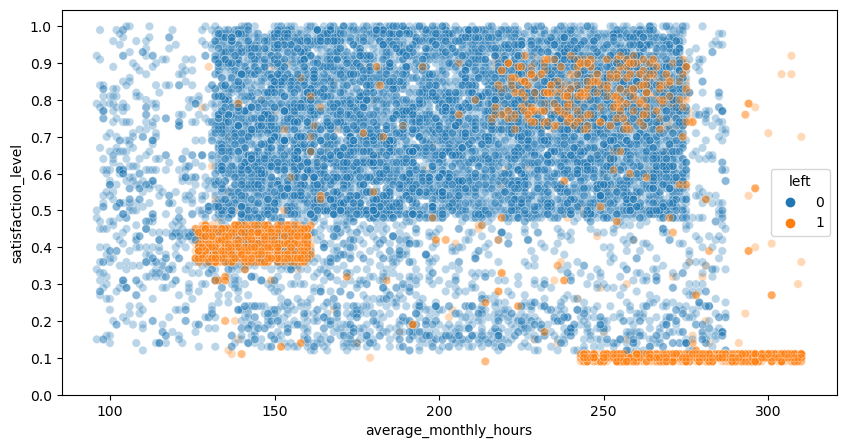

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='average_monthly_hours',y='satisfaction_level',hue='left',alpha=0.3)
plt.yticks([x/10 for x in range(0,11,1)])
plt.show()

On average a person working full time works between 160 to 170 hours per month.

A clear distinction starts appearing between two of the most populous groups. The first are highly overworked employees, with high evaluations but dissatisfied and probably wanted to leave as fast as possible and resigned. Whilke the second are employees who were working less than average, weren't performing up to standards and were probably laid-off.

The third group is still without major characteristics towards wanting to leave, possibly satisfied employeed who found better opportunities

Note: The clear distinctions and shape of the distribution are clear symptoms of either synthetic or manipulated data

It could also be interesting to further observe what impacts satisfaction levels

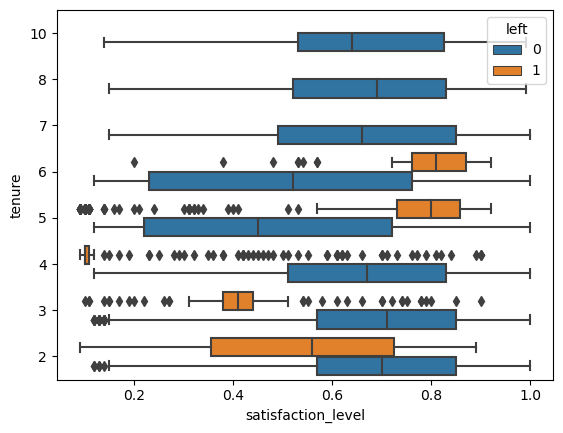

In [23]:
sns.boxplot(data=data1, x='satisfaction_level', y='tenure', hue='left', orient="h")
plt.gca().invert_yaxis()

Overall we see two distinct trends for employees that leave, those with lower tenures and lower satisfactions and those who stayed for longer.

It is also possible to see a decline in satisfaction from the second to fourth year, with it being unnusualy low for those who left during their 4th year, does this have a significant impact on the number of people leaving in that year?

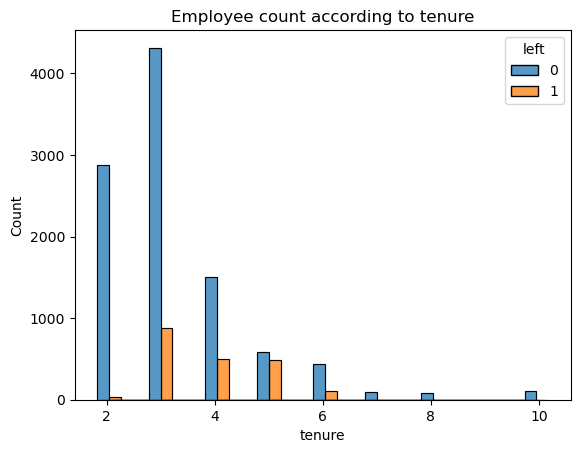

In [24]:
sns.histplot(data=data1, x='tenure', hue='left', multiple='dodge', shrink=5)
plt.title('Employee count according to tenure')
plt.show()

The decline in satisfaction within the 3-4th year seems to translate higly into higher rates of turnover, is there any reason behind this significant drop in satisfaction?

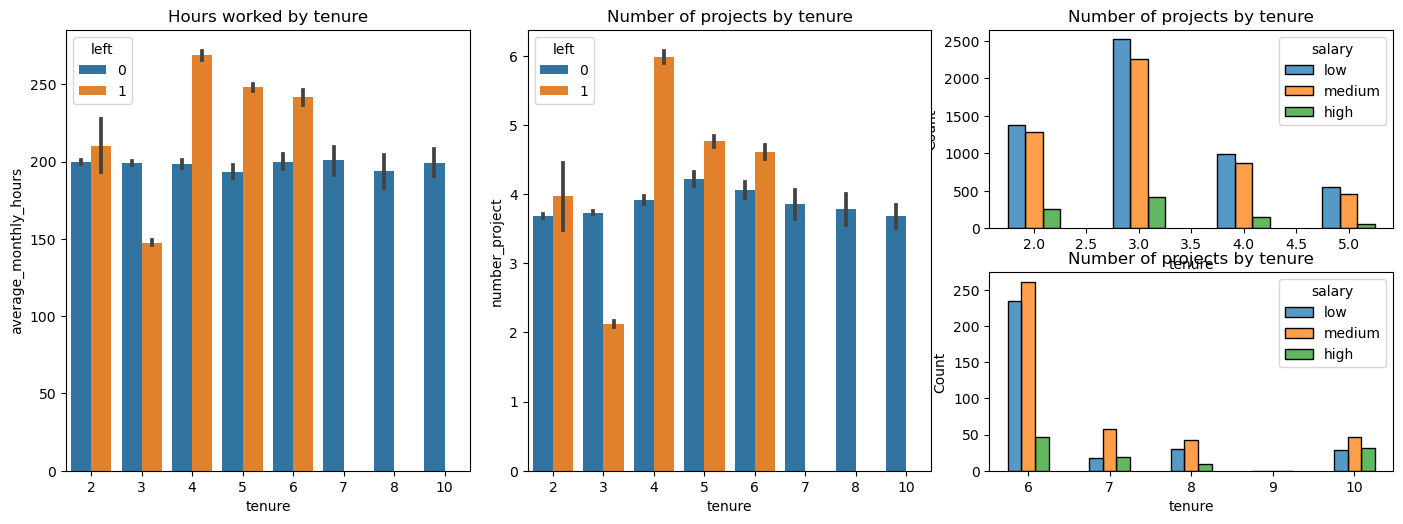

In [25]:
#Setting up the subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (14,5))
gs=axs[1, 2].get_gridspec()
for i in [0,1]:
    for j in [0,1]:
        axs[i,j].remove()
axbig0=fig.add_subplot(gs[0:2, 0])
axbig1=fig.add_subplot(gs[0:2, 1])
fig.tight_layout()

#Separating data by tenure
short_tenure=data1[data1.tenure<6]
long_tenure=data1[data1.tenure>=6]

#Graphs
sns.barplot(data=data1, x='tenure', y='average_monthly_hours', hue='left',ax=axbig0)
axbig0.set_title('Hours worked by tenure')

sns.barplot(data=data1, x='tenure', y='number_project', hue='left',ax=axbig1)
axbig1.set_title('Number of projects by tenure')

sns.histplot(data=short_tenure, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5,ax=axs[0,2])
axs[0,2].set_title('Number of projects by tenure')

sns.histplot(data=long_tenure, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5,ax=axs[1,2])
axs[1,2].set_title('Number of projects by tenure')
plt.show()

An overall increase in number of projects can be seen, especially for those who left at year 4, with them averaging more than 250 hours a month, working on average more than 12.5 hours a day. This increase in workload isn't matched with increases in salary, where the proportions are similair within the first 5 years and only later on do the proportions start shifting towards higher salaries

Beyond this it is also of interest to look whether the employees who're putting in the work are getting the promotions they deserve

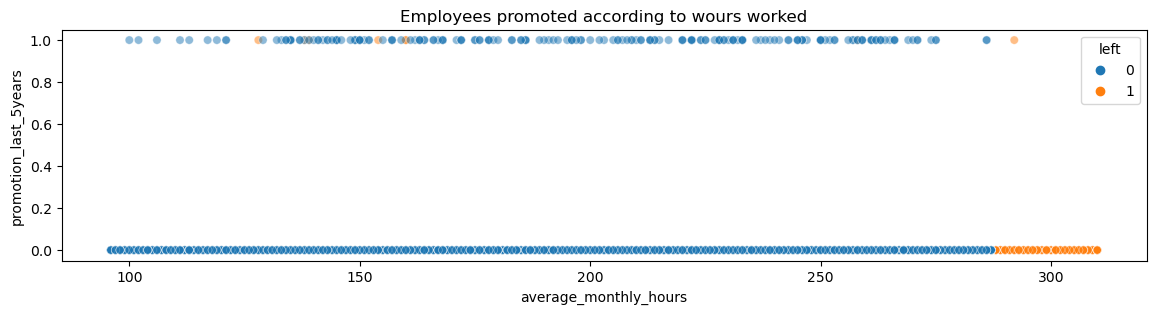

In [26]:
plt.figure(figsize=(14,3))
sns.scatterplot(data=data1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5)
plt.title('Employees promoted according to wours worked')
plt.show()

Overall very few employees are being promoted, and the vast majority of them weren't the highest workers. The plot also shows that the employees weren't promoted and worked the longest hours

Following this, inpecting the distribution accross departments

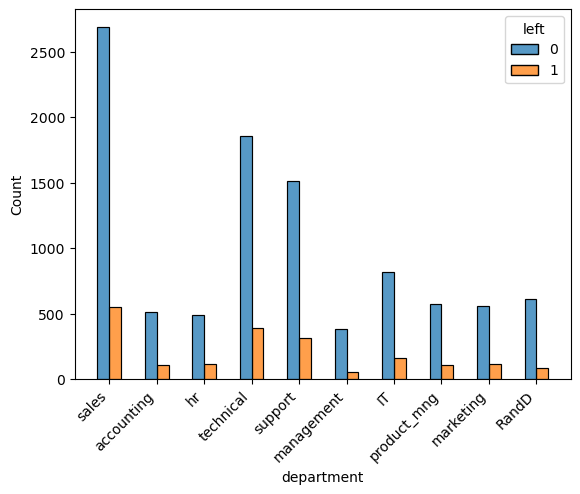

In [27]:
sns.histplot(data=data1, x='department', hue='left', discrete=1,hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45,ha='right')
plt.show()

No department differs significantly from the other in terms of turnover proportion

Lastly checking the correlation between variables

<Axes: >

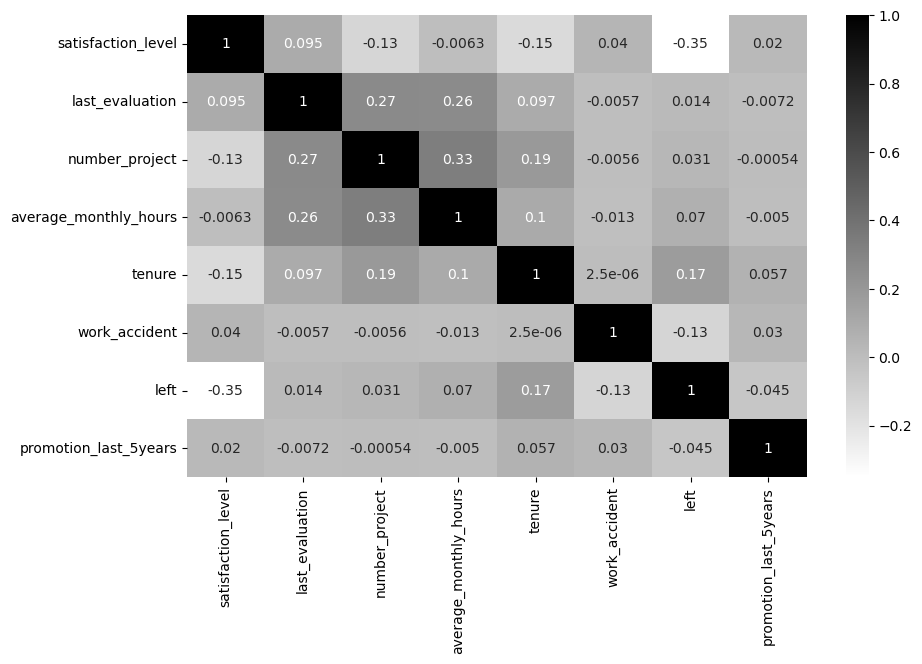

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(data1.iloc[:,0:-2].corr(),annot=True,cmap='binary')

High positive correlation between number of projects, hours worked and evaluation received, and turnover is negatively correlated with employee satisfaction

## Creating the ML models

The goal is to predict whether an employee will leave the company or not, which is a binary categorical outcome. Defining our task as one of binary classification.

There are multiple models available for the task, with the ones considered being:
* Binomial logistic regression
* Naive Bayes
* Single Decision Tree
* Random Forest
* Gradient Boosting

### Saving and loading models

In [29]:
def save_model(model_name,model_object):
    with open(model_name+'.pickle' , 'wb' ) as to_write:
   		 pickle.dump( model_object , to_write )
        
def load_model(model_name,model_object):
    with open(model_name+'.pickle','rb') as to_read:
        model_object = pickle.load(to_read)

### Preparing dataset for modeling

Dataset has two categorical features that need to be transformed into numeric:
* department: non-ordinal categorical variable
* salary: ordinal categorical variable (low-average-high)

In [30]:
data2=data1.copy()

In [31]:
data2.salary.value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [32]:
ordinal_encoder = OrdinalEncoder(categories=[['low','medium','high']])
ordinal_encoder.fit(data2[['salary']])
data2.loc[:,['salary']]=ordinal_encoder.transform(data2[['salary']])

In [33]:
data2.salary=data2.salary.astype('int64')

In [34]:
data2.salary.value_counts()

salary
0    5740
1    5261
2     990
Name: count, dtype: int64

In [35]:
data2 = pd.get_dummies(data2,columns=['department'],drop_first=True)

In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int64  
 9   department_RandD        11991 non-null  bool   
 10  department_accounting   11991 non-null  bool   
 11  department_hr           11991 non-null  bool   
 12  department_management   11991 non-null  bool   
 13  department_marketing    11991 non-null  bool   
 14  department_product_mng  11991 non-null  boo

### Logistic Regression

Logistic regression has 4 main assumptions
* Linearity
* Independent observations
* No multicolinearity
* No Extreme Outliers

To observe multicolinearity:

C:\Users\mglps\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


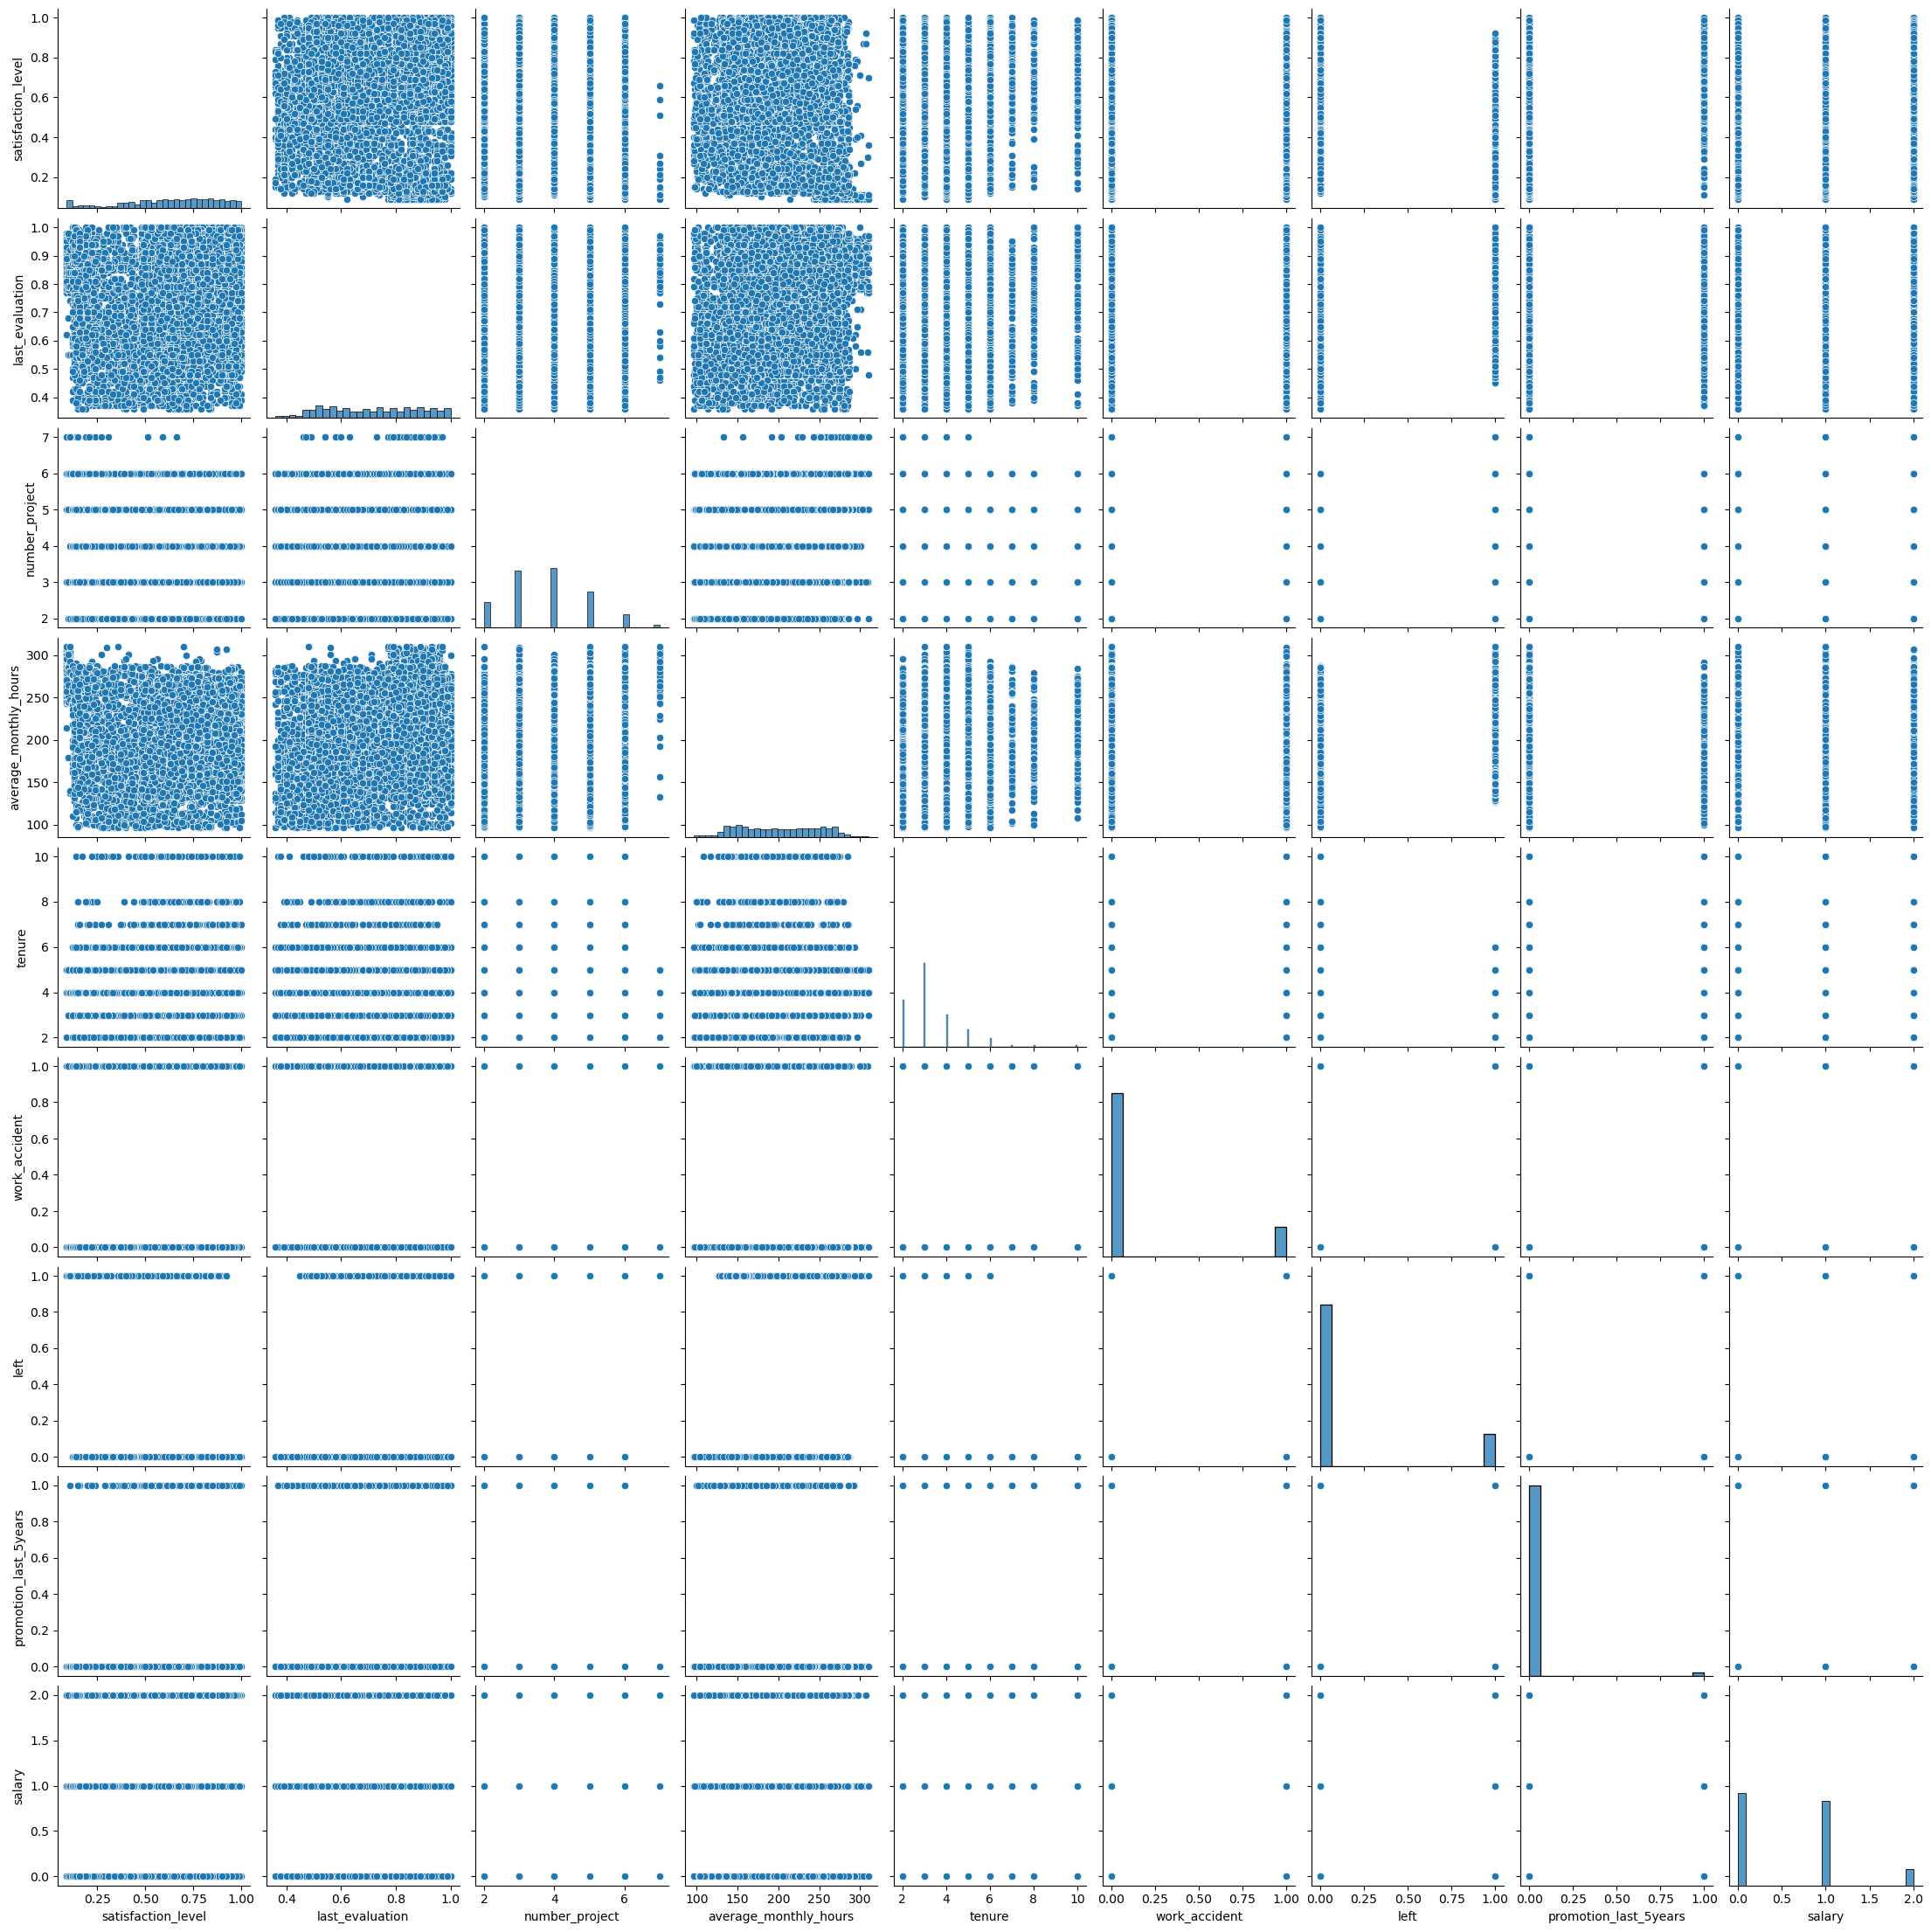

In [37]:
sns.pairplot(data2.iloc[:,:9])
plt.show()

No multicolinearity is present and observations are independent as each is referring to a distinct employee

Removing outliers, as determined previously only present in tenure

In [38]:
# Determining Q1 and Q3
tenure_q1=data2.tenure.quantile(0.25)
tenure_q3=data2.tenure.quantile(0.75)

# Calculating inter-quartile range
tenure_iqr=tenure_q3-tenure_q1

#Creating new dataframe without outliers
data_logreg=data2[(data2.tenure>(tenure_q1-1.5*tenure_iqr))|(data2.tenure<(tenure_q3+1.5*tenure_iqr))]

In [39]:
data_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [40]:
#Selecting the variables
x_logreg = data_logreg.drop(columns=['left'])
y_logreg = data_logreg.left

In [41]:
x_logreg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   promotion_last_5years   11991 non-null  int64  
 7   salary                  11991 non-null  int64  
 8   department_RandD        11991 non-null  bool   
 9   department_accounting   11991 non-null  bool   
 10  department_hr           11991 non-null  bool   
 11  department_management   11991 non-null  bool   
 12  department_marketing    11991 non-null  bool   
 13  department_product_mng  11991 non-null  bool   
 14  department_sales        11991 non-null  boo

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x_logreg,y_logreg,stratify=y_logreg,test_size=0.2,random_state=0)

In [43]:
# Instantiating the model
logreg = LogisticRegression(random_state=0,max_iter=1000)

# Fitting the model
logreg.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000, random_state=0)

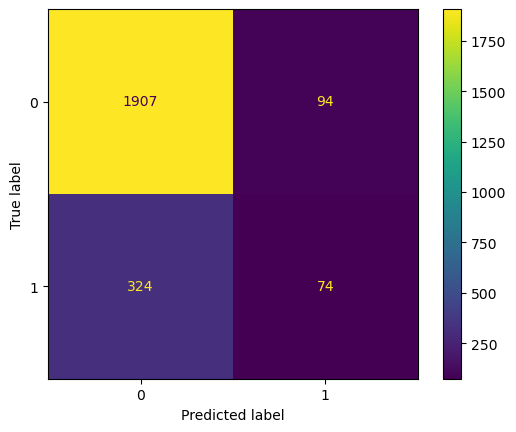

In [44]:
# Predicting turnover using test dataset
ypred_logreg = logreg.predict(xtest)

# Creating the confusion matrix
cm_logreg=metrics.confusion_matrix(ytest,ypred_logreg,labels=logreg.classes_)

# Diplaying the confusion matrix
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_logreg,display_labels=logreg.classes_).plot()

In [45]:
model_results=pd.DataFrame({
    'Name' : ['Logistic Regression'],
    'Accuracy' : [metrics.accuracy_score(ytest,ypred_logreg)],
    'Precision' : [metrics.precision_score(ytest,ypred_logreg)],
    'Recall' : [metrics.recall_score(ytest,ypred_logreg)],
    'F1' : [metrics.f1_score(ytest,ypred_logreg)]})

In [46]:
model_results

,Name,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.825761,0.440476,0.18593,0.261484


In [47]:
save_model('LogReg',logreg)

### Naive Bayes

The only assumption made by the naive Bayes model is independence among predictors, although this doesn't apply as demonstrated previously it can still preform satisfactorly with the assumption broken

In [48]:
x=data2.drop(columns=['left'])
y=data2.left

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

In [50]:
nb = CategoricalNB()

nb.fit(xtrain,ytrain)

CategoricalNB()

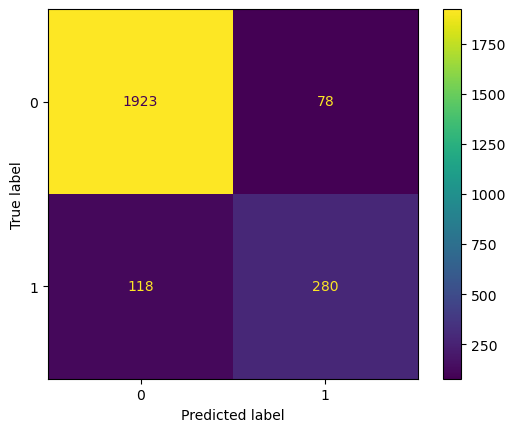

In [51]:
ypred_nb=nb.predict(xtest)

cm_nb=metrics.confusion_matrix(ytest,ypred_nb,labels=nb.classes_)

metrics.ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels=nb.classes_).plot()

In [52]:
model_results=model_results._append(pd.DataFrame({
    'Name':'Naive Bayes',
    'Accuracy' : [metrics.accuracy_score(ytest,ypred_nb)],
    'Precision' : [metrics.precision_score(ytest,ypred_nb)],
    'Recall' : [metrics.recall_score(ytest,ypred_nb)],
    'F1' : [metrics.f1_score(ytest,ypred_nb)]}))

In [53]:
model_results

,Name,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.825761,0.440476,0.185930,0.261484
0,Naive Bayes,0.918299,0.782123,0.703518,0.740741


In [54]:
save_model('Naivebayes',nb)

### Decision-Tree

There are no required assumptions from the model

In this scenarion the company is mostly interested in a model that allows them to know as much as possible who is in danger of leaving the company, for that the scoring metric used will be recall

In [55]:
# Instantiating the model
dt = DecisionTreeClassifier(random_state=0)

# Selecting parameters to tune
params_dt = {
    'max_depth':[4, 6, 8, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 6]
}

# Selecting scores
scoring=('accuracy','precision','recall','f1')

# Instantiating the cross-validation classifier
clf_dt = GridSearchCV(dt,param_grid=params_dt,scoring=scoring,cv=5,refit='recall')

In [56]:
%%time
clf_dt.fit(xtrain,ytrain)

CPU times: total: 4.75 s
Wall time: 4.82 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='recall', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [57]:
print(clf_dt.best_params_)
print(clf_dt.best_score_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9202835117604147


Improving tuning

In [58]:
params_dt = {
    'max_depth':[5,6,7],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2,3]
}
clf_dt = GridSearchCV(dt,param_grid=params_dt,scoring=scoring,cv=5,refit='recall')

In [59]:
%%time
clf_dt.fit(xtrain,ytrain)

CPU times: total: 1.38 s
Wall time: 1.41 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]},
             refit='recall', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [60]:
print(clf_dt.best_params_)
print(clf_dt.best_score_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9202835117604147


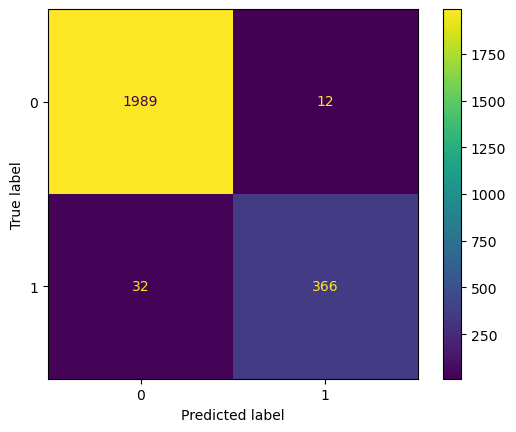

In [61]:
ypred_dt = clf_dt.best_estimator_.predict(xtest)

cm_dt=metrics.confusion_matrix(
    ytest,
    ypred_dt,
    labels=clf_dt.best_estimator_.classes_
)

metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm_dt,
    display_labels=clf_dt.best_estimator_.classes_
).plot()

In [62]:
model_results=model_results._append(pd.DataFrame({
    'Name':['Decision Tree'],
    'Accuracy' : [metrics.accuracy_score(ytest,ypred_dt)],
    'Precision' : [metrics.precision_score(ytest,ypred_dt)],
    'Recall' : [metrics.recall_score(ytest,ypred_dt)],
    'F1' : [metrics.f1_score(ytest,ypred_dt)]}))

In [63]:
model_results

,Name,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.825761,0.440476,0.185930,0.261484
0,Naive Bayes,0.918299,0.782123,0.703518,0.740741
0,Decision Tree,0.981659,0.968254,0.919598,0.943299


In [64]:
save_model('DecisionTree',clf_dt.best_estimator_)

### Random Forest

There are no required assumptions

In [65]:
rf = RandomForestClassifier(random_state=0)

params_rf = {
    'max_depth':[2,5,None],
    'min_samples_leaf':[1,2,3],
    'max_features':[0.25,0.5,0.75],
    'n_estimators':[50,100]
}

clf_rf = GridSearchCV(
    rf,
    param_grid=params_rf,
    scoring=scoring,
    cv=5,
    refit='recall')

In [66]:
%%time
clf_rf.fit(xtrain,ytrain)

CPU times: total: 2min 7s
Wall time: 2min 11s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 5, None],
                         'max_features': [0.25, 0.5, 0.75],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [50, 100]},
             refit='recall', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [67]:
print(clf_rf.best_params_)
print(clf_rf.best_score_)

{'max_depth': None, 'max_features': 0.75, 'min_samples_leaf': 1, 'n_estimators': 50}
0.9215354586857514


Tuning hyperparameters

In [68]:
params_rf = {
    'max_depth':[10,15,None],
    'min_samples_leaf':[1],
    'max_features':[0.6,0.7,0.8,0.9,1],
    'n_estimators':[40,60,70]
}
clf_rf = GridSearchCV(
    rf,
    param_grid=params_rf,
    scoring=scoring,
    cv=5,
    refit='recall')

In [69]:
%%time
clf_rf.fit(xtrain,ytrain)

CPU times: total: 2min 29s
Wall time: 2min 31s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 15, None],
                         'max_features': [0.6, 0.7, 0.8, 0.9, 1],
                         'min_samples_leaf': [1],
                         'n_estimators': [40, 60, 70]},
             refit='recall', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [70]:
print(clf_rf.best_params_)
print(clf_rf.best_score_)

{'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 1, 'n_estimators': 40}
0.9221624179334003


In [71]:
params_rf = {
    'max_depth':[8,9,10,11,12],
    'min_samples_leaf':[1],
    'max_features':[0.8],
    'n_estimators':[20,30,40,50]
}
clf_rf = GridSearchCV(
    rf,
    param_grid=params_rf,
    scoring=scoring,
    cv=5,
    refit='recall')

In [72]:
%%time
clf_rf.fit(xtrain,ytrain)

CPU times: total: 44.2 s
Wall time: 44.7 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [8, 9, 10, 11, 12], 'max_features': [0.8],
                         'min_samples_leaf': [1],
                         'n_estimators': [20, 30, 40, 50]},
             refit='recall', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [73]:
print(clf_rf.best_params_)
print(clf_rf.best_score_)

{'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 1, 'n_estimators': 30}
0.9221624179334003


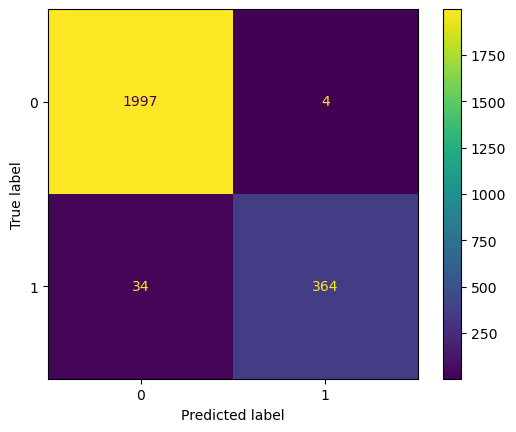

In [74]:
ypred_rf = clf_rf.best_estimator_.predict(xtest)

cm_rf=metrics.confusion_matrix(
    ytest,
    ypred_rf,
    labels=clf_rf.best_estimator_.classes_
)

metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm_rf,
    display_labels=clf_rf.best_estimator_.classes_
).plot()

In [75]:
model_results=model_results._append(pd.DataFrame({
    'Name':['Random Forest'],
    'Accuracy' : [metrics.accuracy_score(ytest,ypred_rf)],
    'Precision' : [metrics.precision_score(ytest,ypred_rf)],
    'Recall' : [metrics.recall_score(ytest,ypred_rf)],
    'F1' : [metrics.f1_score(ytest,ypred_rf)]}))

In [76]:
model_results

,Name,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.825761,0.440476,0.185930,0.261484
0,Naive Bayes,0.918299,0.782123,0.703518,0.740741
0,Decision Tree,0.981659,0.968254,0.919598,0.943299
0,Random Forest,0.984160,0.989130,0.914573,0.950392


In [77]:
save_model('RandomForest',clf_rf.best_estimator_)

### Gradient Boosting

There are no required assumptions

In [78]:
xgb = XGBClassifier(objective='binary:logistic',random_state=0,enable_categorical=True)

params_xgb = {
    'max_depth':[2,5,10],
    'n_estimators':[30,50,80],
    'learning_rate':[0.01,0.1,0.3],
    'min_child_weight':[1,2,3],
    'colsample_bytree':[0.25,0.5,0.75]
}

clf_xgb = GridSearchCV(
    xgb,
    param_grid=params_xgb,
    scoring=scoring,
    cv=5,
    refit='recall')

In [79]:
%%time
clf_xgb.fit(xtrain,ytrain)

C:\Users\mglps\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mglps\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mglps\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mglps\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision 

CPU times: total: 4min 5s
Wall time: 1min 11s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.25, 0.5, 0.75],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [2, 5, 10], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [30, 50, 80]},
             refit='recall', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [80]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)

{'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50}
0.9246761696338794


In [81]:
params_xgb = {
    'max_depth':[4,5,6],
    'n_estimators':[40,50,60],
    'learning_rate':[0.2,0.3,0.4],
    'min_child_weight':[1],
    'colsample_bytree':[0.4,0.5,0.6]
}

clf_xgb = GridSearchCV(
    xgb,
    param_grid=params_xgb,
    scoring=scoring,
    cv=5,
    refit='recall')

In [82]:
%%time
clf_xgb.fit(xtrain,ytrain)

CPU times: total: 1min 17s
Wall time: 22 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
                         'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [4, 5, 6], 'min_child_weight': [1],
                         'n_estimators': [40, 50, 60]},
             refit='recall', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [83]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)

{'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50}
0.9246761696338794


In [84]:
params_xgb = {
    'max_depth':[5],
    'n_estimators':[50],
    'learning_rate':[0.25,0.3,0.35],
    'min_child_weight':[1],
    'colsample_bytree':[0.5]
}

clf_xgb = GridSearchCV(
    xgb,
    param_grid=params_xgb,
    scoring=scoring,
    cv=5,
    refit='recall')

In [85]:
%%time
clf_xgb.fit(xtrain,ytrain)

CPU times: total: 2.31 s
Wall time: 1.18 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.5],
                         'learning_rate': [0.25, 0.3, 0.35], 'max_depth': [5],
                         'min_child_weight': [1], 'n_estimators': [50]},
             refit='recall', scoring=('accuracy', 'precision', 'recall', 'f1'))

In [86]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)

{'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50}
0.9246761696338794


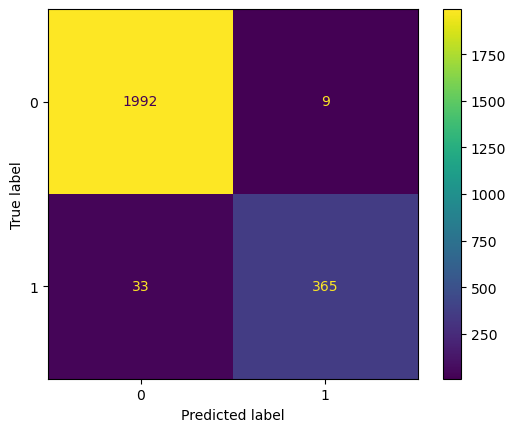

In [87]:
ypred_xgb = clf_xgb.best_estimator_.predict(xtest)

cm_xgb=metrics.confusion_matrix(
    ytest,
    ypred_xgb,
    labels=clf_xgb.best_estimator_.classes_
)

metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm_xgb,
    display_labels=clf_xgb.best_estimator_.classes_
).plot()

In [88]:
model_results=model_results._append(pd.DataFrame({
    'Name':['Gradient Boosting'],
    'Accuracy' : [metrics.accuracy_score(ytest,ypred_xgb)],
    'Precision' : [metrics.precision_score(ytest,ypred_xgb)],
    'Recall' : [metrics.recall_score(ytest,ypred_xgb)],
    'F1' : [metrics.f1_score(ytest,ypred_xgb)]}))

In [89]:
model_results

,Name,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.825761,0.440476,0.185930,0.261484
0,Naive Bayes,0.918299,0.782123,0.703518,0.740741
0,Decision Tree,0.981659,0.968254,0.919598,0.943299
0,Random Forest,0.984160,0.989130,0.914573,0.950392
0,Gradient Boosting,0.982493,0.975936,0.917085,0.945596


In [90]:
save_model('GradientBoosting',clf_xgb.best_estimator_)

### Most important features for modeling

In [91]:
importances=pd.DataFrame({'feature':x.columns,'feature_importance':clf_dt.best_estimator_.feature_importances_})
importances=importances[importances.feature_importance>0].sort_values(by='feature_importance',ascending=False)
importances

,feature,feature_importance
0,satisfaction_level,0.523339
1,last_evaluation,0.166406
2,number_project,0.129295
4,tenure,0.114793
3,average_monthly_hours,0.066123
16,department_technical,0.000044


Since both satisfaction levels and evaluations are so significant for the model, it could be usefull to develop a model to predict the values that doesn't depend on self reported values

Note: Satisfaction levels might be a scource of data leakage, further development could be made to have models that aren't based of such features

## Conclusion

Based on the analysis, the decision Tree and Random Forest models emerged as the most effective tools for predicting employee turnover as they achieved the highest recall and precision scores, suggesting they can reliably identify employees who may leave the company. These models can be used by HR to focus retention efforts on high-risk employees.

## Recommendations

* **Focus on employee satisfaction:** The company should prioritize initiatives to improve employee satisfaction, as this was a key factor in predicting turnover.

* **Work-life balance:** Employees with the most work hours billed have the highest risk of leaving, so a more balanced approach to time-spent at work is essential.

* **Career development:** Offering promotions and career advancement opportunities could be a way to retain employees, especially those who are highly evaluated and are dedicated to the work.

## Future Steps

* Expand the analysis by including time-series data, which could provide deeper insights into employee behavior over time.

* Investigate the impact of external factors, such as economic conditions, on employee turnover.

* Test models with additional features, such as work-life balance or employee project interest, to enhance prediction accuracy further.